Python Project : Analyze and Creating Prediction Model for Student Score Test




# Introduction

This dataset contains the background of the students and the test results obtained. The given info contains:



*   **school** - Name of the school the student is enrolled in.
*   **school_setting** - The location of the school.
*   **school_type** - The type of school. Either public or non-public.
*   **classrooom** - The type of classroom.
*   **teaching_method** - Teaching methods: Either experimental or Standard.
*   **n_student** - Number of students in the class.
*   **student_id** - A unique ID for each student.
*   **gender** - The gender of the students: male or female.
*   **lunch** - Whether a student qualifies for free/subsidized lunch or not.
*   **pretest** - The pretest score of the students out of 100


The project goal is to get external insight factors that can potentially affect students' performance on the test results, and if it does, what can we predict based on these results.

# Import Packages

First, we have to run important packages to make sure our code below can run normally 

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import explained_variance_score, mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Import dataset and read the data

We import a dataset from my archive and view data at a glance by viewing the top 5 data, bottom, and randomly.

In [2]:
df = pd.read_csv('https://archive.org/download/test_scores_202110/test_scores.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [3]:
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [4]:
df.tail()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
2128,ZOWMK,Urban,Public,ZBH,Standard,30.0,T8LSK,Female,Does not qualify,39.0,55.0
2129,ZOWMK,Urban,Public,ZBH,Standard,30.0,VNP26,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,ZOWMK,Urban,Public,ZBH,Standard,30.0,YDR1Z,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,ZOWMK,Urban,Public,ZBH,Standard,30.0,YUEIH,Male,Qualifies for reduced/free lunch,46.0,53.0
2132,ZOWMK,Urban,Public,ZBH,Standard,30.0,ZVCQ8,Male,Qualifies for reduced/free lunch,41.0,48.0


In [5]:
df.sample(5)

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
1786,VKWQH,Rural,Public,DFQ,Experimental,19.0,NC4UO,Male,Does not qualify,66.0,80.0
59,CCAAW,Suburban,Non-public,EPS,Experimental,20.0,2RA1H,Female,Does not qualify,63.0,80.0
1216,OJOBU,Rural,Public,XJ8,Standard,23.0,AD5OK,Male,Qualifies for reduced/free lunch,55.0,62.0
1655,UUUQX,Suburban,Non-public,P8I,Standard,20.0,C3584,Female,Does not qualify,71.0,82.0
564,GJJHK,Suburban,Public,X78,Standard,21.0,SJ05X,Female,Qualifies for reduced/free lunch,54.0,69.0


This dataset has 2133 rows and 11 columns, consists of 8 categorical variables and 3 numerical variables. There are 3 columns contain unique ID that we need to investigate how important the data is to be included in our model.



# Initial EDA

In [6]:
#Return unique values of object (categorical) variables
for col in df:
    if df[col].dtype == "object":
        print(col + " - " + str(len(np.unique(df[col]))))
        print(str(np.unique(df[col])))

school - 23
['ANKYI' 'CCAAW' 'CIMBB' 'CUQAM' 'DNQDD' 'FBUMG' 'GJJHK' 'GOKXL' 'GOOBU'
 'IDGFP' 'KFZMY' 'KZKKE' 'LAYPA' 'OJOBU' 'QOQTS' 'UAGPU' 'UKPGS' 'UUUQX'
 'VHDHF' 'VKWQH' 'VVTVA' 'ZMNYA' 'ZOWMK']
school_setting - 3
['Rural' 'Suburban' 'Urban']
school_type - 2
['Non-public' 'Public']
classroom - 97
['05H' '08N' '0N7' '18K' '197' '1Q1' '1SZ' '1UU' '1VD' '21Q' '2AP' '2B1'
 '2BR' '341' '3D0' '3XJ' '4NN' '5JK' '5LQ' '5SZ' '62L' '6C1' '6OL' '6U9'
 '7BL' '98D' '9AW' 'A33' 'A93' 'AE1' 'AJ1' 'BFY' 'CD8' 'CII' 'CXC' 'D33'
 'DFQ' 'EID' 'ENO' 'EPS' 'FS3' 'G2L' 'GYM' 'H7S' 'HCB' 'HKF' 'HUJ' 'IEM'
 'IPU' 'IQN' 'J6X' 'J8J' 'JGD' 'KR1' 'KXB' 'NOR' 'NWZ' 'O6A' 'OMI' 'P2A'
 'P8I' 'PBA' 'PC6' 'PGH' 'PGK' 'PW5' 'Q0E' 'QA2' 'QTU' 'RA5' 'RK7' 'ROP'
 'S98' 'SSP' 'ST7' 'SUR' 'TB5' 'TSA' 'U6J' 'UHU' 'UWK' 'V77' 'VA6' 'W8A'
 'X2O' 'X6Z' 'X78' 'XJ8' 'XXE' 'XXJ' 'XZ4' 'XZM' 'YTB' 'YUC' 'ZBH' 'ZDT'
 'ZNS']
teaching_method - 2
['Experimental' 'Standard']
student_id - 2133
['02WIH' '038FI' '03T0E' ... 'ZX8TB' 'Z

In [7]:
#crosstab of classroom and school to see which classrooms are in each school
df_count = pd.crosstab(df.classroom, df.school)
print("number of classrooms in each school")  
#count the number of classrooms that exist in each school
print (df_count[df_count > 1.0].count())
print("")

#similar crosstab to see how many schools have each classroom
df_count2 = pd.crosstab( df.school,df.classroom,)
print("max no of schools with each classroom - " + str(df_count2[df_count2 > 1.0].count().max()))

number of classrooms in each school
school
ANKYI    2
CCAAW    6
CIMBB    4
CUQAM    4
DNQDD    5
FBUMG    3
GJJHK    5
GOKXL    3
GOOBU    6
IDGFP    5
KFZMY    2
KZKKE    5
LAYPA    3
OJOBU    4
QOQTS    6
UAGPU    4
UKPGS    6
UUUQX    5
VHDHF    3
VKWQH    5
VVTVA    4
ZMNYA    3
ZOWMK    4
dtype: int64

max no of schools with each classroom - 1




This confirms that each school has several classrooms, but each classroom only exists within one school.
We assume that classroom is an ID for a unique classroom, not a category of classrooms.


---



We can get some insights from identify the unique values
*   Students are coming accross 23 different schools
*   Among schools are located from 3 different school settings
*   Schools are classified into 2 school types
*   There are 97 classes from 23 schools
*   2 teaching methods been tought in all 23 schools
*   Total 2133 students from all 23 schools


# Find Missing and Duplicate Value

In [8]:
print(df.isnull().sum())

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64


In [9]:
print(df.isna().sum())

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64


In [10]:
df.duplicated().sum()

0

There is no missing value and duplicate value found in this dataset


# Exploratory data analysis (EDA)

We will explore some parts of the data using graph to find another insights and that will be included in our model.


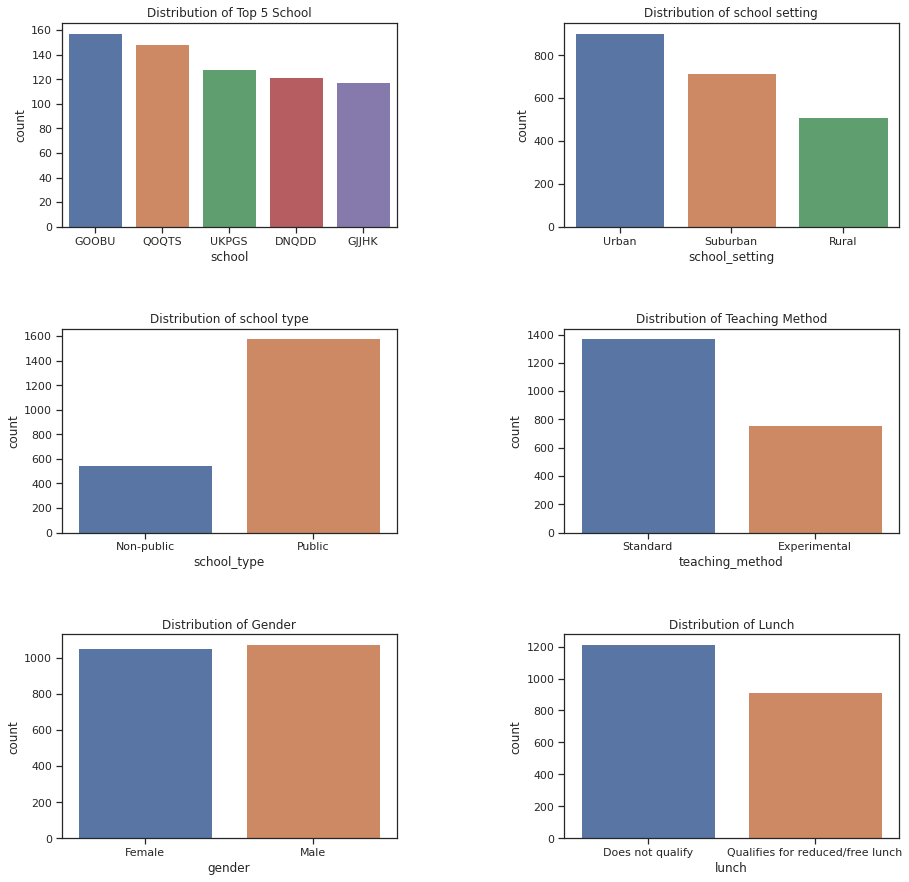

In [11]:
fig = plt.figure(figsize=(15,15))
gs = fig.add_gridspec(3,2)
gs.update(wspace = 0.5 , hspace = 0.5)
sns.set(style = "ticks")


ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])


#Set title and label
ax0.set_title("Distribution of Top 5 School")
ax1.set_title("Distribution of school setting")
ax2.set_title("Distribution of school type")
ax3.set_title("Distribution of Teaching Method")
ax4.set_title("Distribution of Gender")
ax5.set_title("Distribution of Lunch")

ax0.set_xticklabels(labels = [], rotation = 90) 

#construct subplots
sns.countplot(ax = ax0 , x = "school" , data = df ,order = df.school.value_counts().iloc[:5].index )
sns.countplot(ax = ax1 , x = "school_setting" , data = df)
sns.countplot(ax = ax2 , x = "school_type" , data = df)
sns.countplot(ax = ax3 , x = "teaching_method" , data = df)
sns.countplot(ax = ax4 , x = "gender" , data = df)
sns.countplot(ax = ax5 , x = "lunch" , data = df)



In [12]:
#calculating the mean score for each demographic
gender_score = df.groupby('gender').mean()['posttest'].reset_index()
type_score = df.groupby('school_type').mean()['posttest'].reset_index()
lunch_score = df.groupby('lunch').mean()['posttest'].reset_index()
method_score = df.groupby('teaching_method').mean()['posttest'].reset_index()
setting_score = df.groupby('school_setting').mean()['posttest'].reset_index()

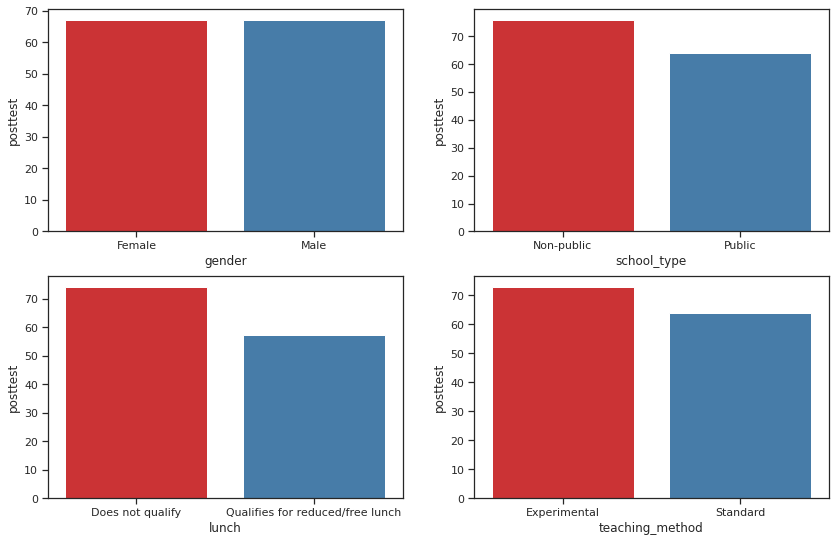

In [13]:
fig, ax = plt.subplots(2,2, figsize = [14, 9])

sns.set_palette('Set1')
sns.barplot(data=gender_score, y = 'posttest', x = 'gender', ax = ax[0,0])
sns.barplot(data=type_score, y = 'posttest', x = 'school_type', ax = ax[0,1])
sns.barplot(data=lunch_score, y = 'posttest', x = 'lunch', ax = ax[1,0])
sns.barplot(data=method_score, y = 'posttest', x = 'teaching_method', ax = ax[1,1])


sns.set_style('whitegrid')
plt.show()

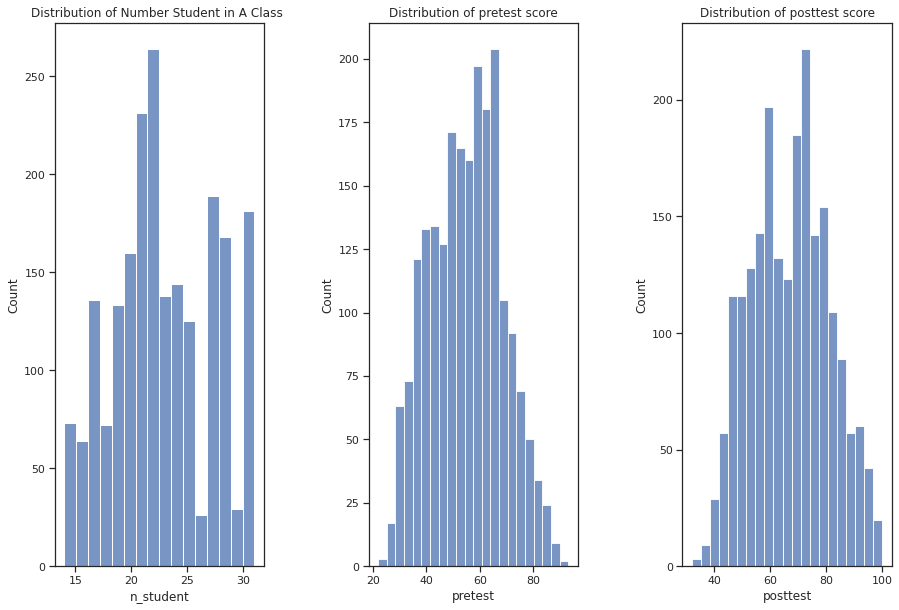

In [14]:
fig = plt.figure(figsize=(15,10))
gs = fig.add_gridspec(1,3)
gs.update(wspace = 0.5 , hspace = 0.5)
sns.set(style = "ticks")


ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])



#Set title and label
ax0.set_title("Distribution of Number Student in A Class ")
ax1.set_title("Distribution of pretest score")
ax2.set_title("Distribution of posttest score")


#construct subplots
sns.histplot(ax = ax0 , x = "n_student" , data = df)
sns.histplot(ax = ax1 , x = "pretest" , data = df)
sns.histplot(ax = ax2 , x = "posttest" , data = df)


From graph above we can get some insights such as:

*   Gender appears not to be a relevant factor for test score.
*   Students from public schools have a mean performance gap compared to private school students of more than 15%.
*   Students in poor economic conditions (qualifies for lunch program) have a even more score gap compared with those who don't qualify for reduced/free lunch.
*  Public schools have more students per classroom
*   Students from schools that use experimental teaching programs have a greater mean score compared to those from Standard schools.
* Students without free lunch will have a better test results and students with free lunch will have lower test results.
* n_student is right-skewed
* pretest and posttest are normal distribution





# Feature Engineering

From the dataset, there are categorical variables, we need to convert them to numeric through the label encoding and one hot encoding process. But, first we have to drop unique values in "school", "classroom", and "student_id", that three columns doesn't have any effect on our label posttest because they just unique ID, so we can drop them to our model

In [15]:
df.drop(["school", "classroom", "student_id",], axis=1, inplace=True)

In [16]:
labelencoder = LabelEncoder()

df['lunch'] = labelencoder.fit_transform(df['lunch'])
df['school_type'] = labelencoder.fit_transform(df['school_type'])
df['teaching_method'] = labelencoder.fit_transform(df['teaching_method'])
df['gender'] = labelencoder.fit_transform(df['gender'])

In [17]:
df.sample(10)

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
2031,Urban,1,1,27.0,0,1,52.0,62.0
1315,Urban,1,1,28.0,1,0,54.0,65.0
373,Suburban,1,0,20.0,1,0,45.0,67.0
1881,Urban,1,0,30.0,0,1,30.0,47.0
40,Urban,0,1,21.0,1,0,60.0,66.0
1321,Urban,1,1,28.0,1,0,51.0,62.0
1076,Rural,1,1,23.0,0,1,34.0,49.0
825,Urban,1,0,26.0,1,1,42.0,55.0
108,Suburban,0,1,21.0,1,0,73.0,80.0
1086,Rural,1,1,23.0,1,1,31.0,42.0


There is "school_setting" column that we need to encode, but because this column has more than 2 values, we need to use one hot encoding

In [18]:
df = pd.get_dummies(df)
df.sample(10)

,school_type,teaching_method,n_student,gender,lunch,pretest,posttest,school_setting_Rural,school_setting_Suburban,school_setting_Urban
1884,1,0,30.0,0,1,31.0,48.0,0,0,1
1786,1,0,19.0,1,0,66.0,80.0,1,0,0
479,0,0,18.0,0,0,73.0,82.0,1,0,0
1134,1,1,19.0,0,0,60.0,66.0,1,0,0
1351,1,0,25.0,1,0,65.0,78.0,0,0,1
1356,1,0,25.0,1,0,63.0,74.0,0,0,1
1682,0,0,20.0,0,1,59.0,72.0,1,0,0
1308,1,1,28.0,1,0,59.0,66.0,0,0,1
356,1,1,27.0,0,1,47.0,56.0,0,1,0
1556,1,0,23.0,0,0,73.0,91.0,0,1,0


After Encoding, we need to move the column on original place (at the beginning of the column)

In [19]:
first_column = df.pop('school_setting_Rural')
second_column = df.pop('school_setting_Suburban')
third_column = df.pop('school_setting_Urban')

df.insert(0, 'school_setting_Rural', first_column)
df.insert(0, 'school_setting_Suburban', second_column)
df.insert(0, 'school_setting_Urban', third_column)

In [20]:
df.head()

,school_setting_Urban,school_setting_Suburban,school_setting_Rural,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,1,0,0,0,1,20.0,0,0,62.0,72.0
1,1,0,0,0,1,20.0,0,0,66.0,79.0
2,1,0,0,0,1,20.0,1,0,64.0,76.0
3,1,0,0,0,1,20.0,0,0,61.0,77.0
4,1,0,0,0,1,20.0,1,0,64.0,76.0


# Correlation Matrix

Through the Correlation Matrix, we are looking for correlations between variables

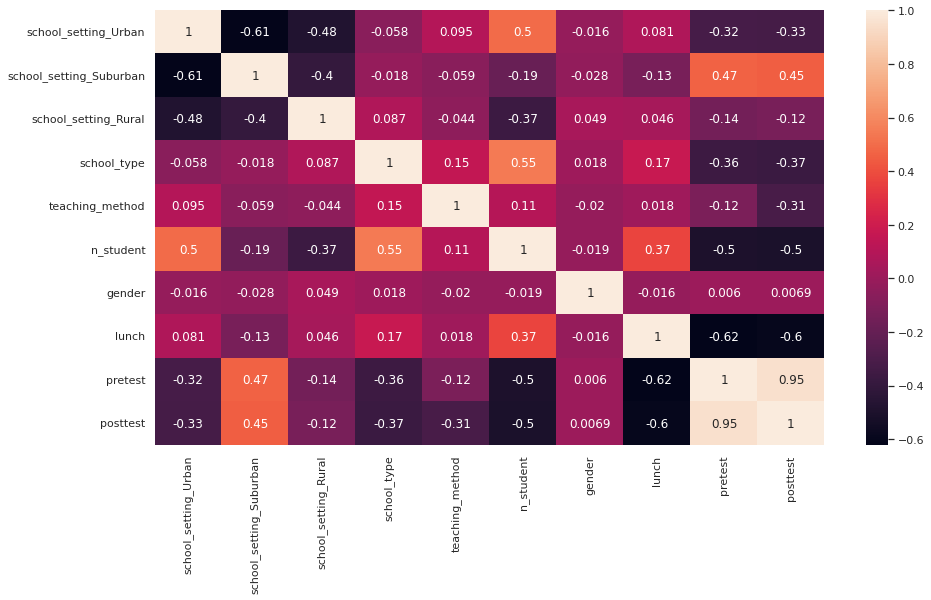

In [21]:
corr = df.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, annot=True)

We can see there is a really good correlation between pre-test scores and post-test scores. BUT, we also see that pre-test score is also negatively correlated with lunch, number of students in class, school_type, and school_setting. Pre-test scores are positively correlated with teaching methods.

# Model Summary

In [22]:
regplot = smf.ols('posttest ~ pretest', data=df).fit()
print(regplot.summary())

                            OLS Regression Results                            
Dep. Variable:               posttest   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 2.011e+04
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:25:13   Log-Likelihood:                -6151.9
No. Observations:                2133   AIC:                         1.231e+04
Df Residuals:                    2131   BIC:                         1.232e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.2131      0.391     33.757      0.0

Ok, so this is a summary of the association between pre-test and post-test scores which we already know is strong. We can see that the p-value is low (which tells us about the strong relationship), but we also see the R-squared, 90%. Meaning, pre-test scores explain 90,4% of the variability in post-test scores.

Let's see what happens when we add in all other variables in a multiple regression


In [23]:
regplot = smf.ols('posttest ~ pretest + lunch + gender +n_student + teaching_method + school_type + school_setting_Rural + school_setting_Suburban + school_setting_Urban', data=df).fit()
print(regplot.summary())

                            OLS Regression Results                            
Dep. Variable:               posttest   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     4785.
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:25:13   Log-Likelihood:                -5511.6
No. Observations:                2133   AIC:                         1.104e+04
Df Residuals:                    2124   BIC:                         1.109e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Ok, so at first glance we can already conclude that school type & gender are not a very good predictors of post-test score based on their p-values that indicate a weak association.


# Building Regression Models

Features are often referred to as "independent variables" and Label is often referred to as "dependent variable".

Here posttest is our label because it depends on other features.

In [24]:
X = df.drop(['posttest','gender','school_type'],axis=1)
y = df['posttest']
len(X)

2133

Splitting the data in training and testing set

*  Training data set is used for fitting our model to learn the patterns.
*  Testing data set is used for prediction and unbiased evaluation of our final model

Training data set - 70% of the total data

Testing data set - 30% of the total data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We need to check again our train and testing data before regression step.

In [26]:
X_train

,school_setting_Urban,school_setting_Suburban,school_setting_Rural,teaching_method,n_student,lunch,pretest
614,0,1,0,1,27.0,1,55.0
1732,0,0,1,0,15.0,1,46.0
861,1,0,0,0,21.0,0,82.0
1083,0,0,1,1,23.0,1,33.0
371,0,1,0,0,20.0,0,48.0
...,...,...,...,...,...,...,...
1638,0,1,0,0,16.0,0,71.0
1095,0,0,1,1,23.0,1,36.0
1130,0,0,1,1,19.0,0,60.0
1294,1,0,0,1,22.0,0,49.0


In [27]:
y_train

614     61.0
1732    64.0
861     93.0
1083    46.0
371     65.0
        ... 
1638    81.0
1095    45.0
1130    71.0
1294    56.0
860     80.0
Name: posttest, Length: 1493, dtype: float64

In [28]:
X_test

,school_setting_Urban,school_setting_Suburban,school_setting_Rural,teaching_method,n_student,lunch,pretest
282,1,0,0,1,28.0,0,53.0
2014,0,1,0,0,23.0,0,70.0
1719,0,0,1,0,15.0,1,56.0
994,0,0,1,1,20.0,1,51.0
2033,1,0,0,1,27.0,1,53.0
...,...,...,...,...,...,...,...
619,0,0,1,0,22.0,1,58.0
1882,1,0,0,0,30.0,1,38.0
158,1,0,0,1,19.0,0,68.0
788,1,0,0,1,25.0,1,44.0


In [29]:
y_test

282     68.0
2014    87.0
1719    70.0
994     61.0
2033    63.0
        ... 
619     70.0
1882    52.0
158     78.0
788     52.0
272     58.0
Name: posttest, Length: 640, dtype: float64

Our Training and testing data looks good, and then we create function to find explained variance and accuracy score.

In [30]:
def score(y_test, y_pred):
    """Helper function for evaluation metrics."""
    explained_variance = explained_variance_score(y_test, y_pred) * 100
    mae = round(mean_absolute_error(y_test, y_pred), 2)
    print(f"""Explained Variance: {explained_variance:.2f}%
MAE: {mae:.2f}""")
    
    return explained_variance

In [31]:
accuracy_scores = np.zeros(6, dtype="float64")


Linear Regression


In [32]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
accuracy_scores[0] = score(y_test, y_pred)

Explained Variance: 94.76%
MAE: 2.52



Lasso Regression

In [33]:
reg1 = Lasso().fit(X_train, y_train)
y_pred1 = reg1.predict(X_test)
accuracy_scores[1] = score(y_test, y_pred1)

Explained Variance: 92.55%
MAE: 3.04



Decision Tree Regression

In [34]:
reg2 = DecisionTreeRegressor().fit(X_train, y_train)
y_pred2 = reg2.predict(X_test)
accuracy_scores[2] = score(y_test, y_pred2)

Explained Variance: 92.34%
MAE: 3.03


Support Vector Regression

In [35]:
reg3 = SVR().fit(X_train, y_train)
y_pred3 = reg3.predict(X_test)
accuracy_scores[3] = score(y_test, y_pred3)

Explained Variance: 91.11%
MAE: 3.36


Random Forest Regression

In [36]:
reg4 = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
y_pred4 = reg4.predict(X_test)
accuracy_scores[4] = score(y_test, y_pred4)

Explained Variance: 94.24%
MAE: 2.65


Neural Network Regression

In [37]:
tf.random.set_seed(42)

reg5 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1),
])

reg5.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mae"])

history = reg5.fit(X_train, y_train, epochs=100, verbose=0)

In [38]:
reg5.evaluate(X_test, y_test)

20/20 [==============================] - 0s 1ms/step - loss: 2.8857 - mae: 2.8857


[2.8856632709503174, 2.8856632709503174]

In [39]:
y_pred5 = reg5.predict(X_test)
accuracy_scores[5] = score(y_test, y_pred5)

Explained Variance: 94.70%
MAE: 2.89


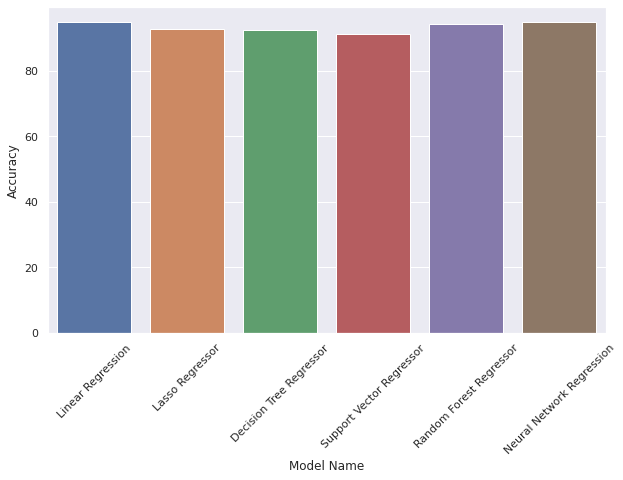

In [40]:
models = [
          "Linear Regression", "Lasso Regressor", "Decision Tree Regressor",
          "Support Vector Regressor", "Random Forest Regressor", "Neural Network Regression",
         ]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracy_scores)

plt.xlabel("Model Name")
plt.xticks(rotation = 45)
plt.ylabel("Accuracy")

plt.show()

According to 6 models above, Linear Regression model has the highest Explained Variance: 94.76% and the smallest MAE: 2.52